In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import numpy as np

In [8]:
import zipfile
zipped_path = "archive.zip"
path = "crop_dataset"
with zipfile.ZipFile(zipped_path) as file:
    file.extractall(path)

In [9]:
path = "crop_dataset/Crop_recommendation.csv"
def read_df():
    return pd.read_csv(path)

df = read_df()
df.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [10]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [11]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


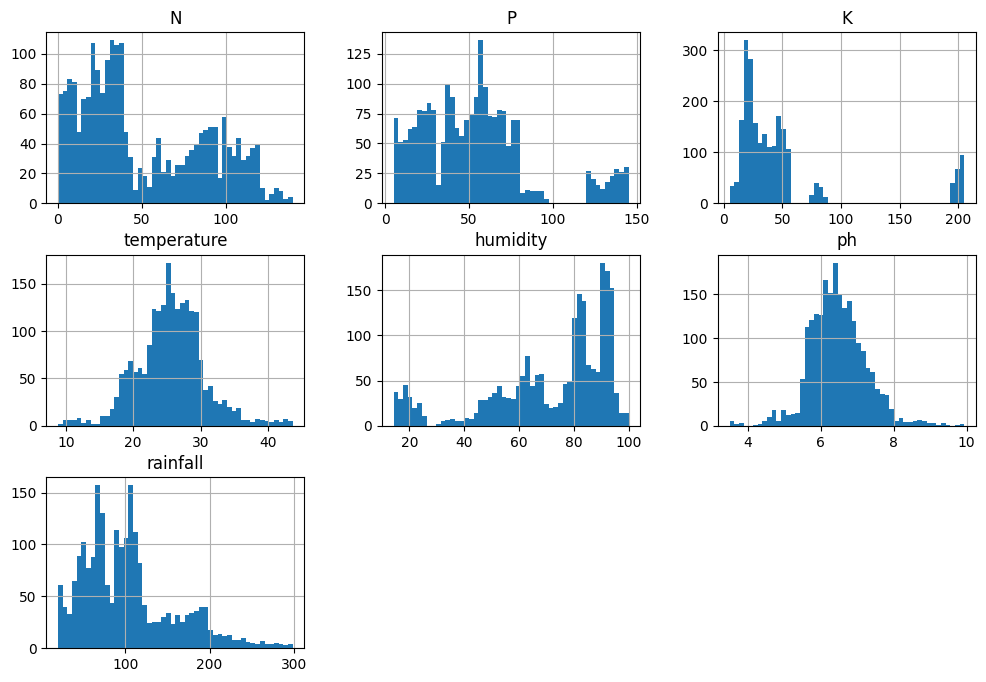

In [13]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

In [56]:
ls

 Volume in drive C has no label.
 Volume Serial Number is C878-16FE

 Directory of C:\Users\State_Space_Lab\3mtt folder\machine learning\kanjifly

22/12/2025  18:14    <DIR>          .
22/12/2025  15:05    <DIR>          ..
21/12/2025  14:41    <DIR>          .gradio
21/12/2025  17:28    <DIR>          .ipynb_checkpoints
22/12/2025  18:14             1,465 app.py
22/12/2025  14:59            65,234 archive.zip
22/12/2025  15:08    <DIR>          crop_dataset
18/12/2025  22:40           374,725 crop_dataset.csv
18/12/2025  22:43           110,073 crop_dataset_2.zip
21/12/2025  16:25         3,147,167 customer_bookings.csv
21/12/2025  12:23         1,044,988 dtc.pkl
22/12/2025  18:06           169,655 ml_test.ipynb
18/12/2025  22:50                10 README.md
               8 File(s)      4,913,317 bytes
               5 Dir(s)   7,712,161,792 bytes free


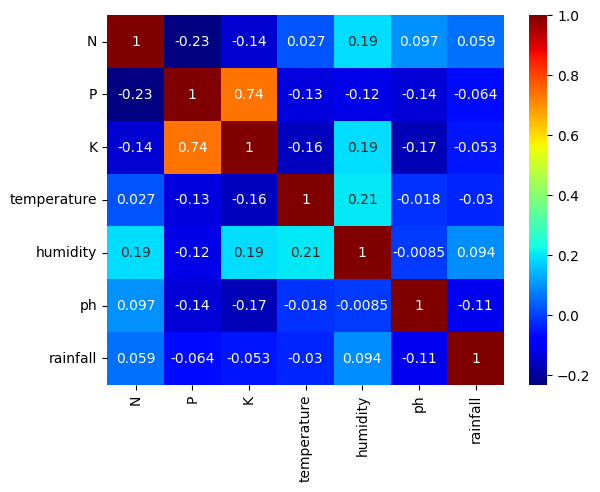

In [14]:
corr = df.select_dtypes(include=np.number).corr(method="pearson")
sns.heatmap(corr, annot=True, cbar=True, cmap="jet")
plt.show()

In [60]:
from sklearn.pipeline  import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import train_test_split
import os



In [17]:
x, y = df.drop("label", axis=1), df[["label"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=50)



x_num_feat = x_train.select_dtypes(include=np.number).columns
x_cat_feat = x_train.select_dtypes(include=object).columns



x_train.shape, y_train.shape
#cat_feat.shape, num_feat.shape, label.shape
x_num_feat, x_cat_feat


(Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object'),
 Index([], dtype='object'))

In [18]:
cat_pip = make_pipeline(
    OneHotEncoder(),
)
num_pip  = make_pipeline(
     StandardScaler(),
)



In [20]:
merge_preprocessing = ColumnTransformer([
    ("num", num_pip, x_num_feat),
    ("cat", cat_pip, x_cat_feat),

])

x_processed = merge_preprocessing.fit_transform(x_train)
y_encoded = cat_pip.fit_transform(y_train)


In [22]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier

rfc = make_pipeline(merge_preprocessing, RandomForestClassifier(random_state=50))
dtc = make_pipeline(merge_preprocessing, DecisionTreeClassifier(random_state=50))


In [23]:
rfc.fit(x_train, y_train)
#rfr.fit(x_train, y_train)
dtc.fit(x_train, y_train)
#dtr.fit(x_train, y_train)


C:\Users\State_Space_Lab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,steps,"[('columntransformer', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [33]:
rtc_pred = rfc.predict(x_test)
dtc_pred = dtc.predict(x_test)

In [31]:
from  sklearn.metrics import accuracy_score, classification_report, roc_curve

In [75]:
accuracy = accuracy_score(y_test, rtc_pred)
accuracy*100

99.54545454545455

In [27]:
accuracy = accuracy_score(y_test, dtc_pred)
accuracy*100

97.72727272727273

In [29]:
report = classification_report(y_test, dtc_pred)
report

'              precision    recall  f1-score   support\n\n       apple       1.00      1.00      1.00        32\n      banana       0.86      1.00      0.92        24\n   blackgram       1.00      1.00      1.00        29\n    chickpea       1.00      1.00      1.00        36\n     coconut       1.00      1.00      1.00        34\n      coffee       1.00      1.00      1.00        27\n      cotton       0.93      1.00      0.97        28\n      grapes       1.00      1.00      1.00        32\n        jute       0.95      0.83      0.89        42\n kidneybeans       1.00      1.00      1.00        21\n      lentil       1.00      0.97      0.98        31\n       maize       1.00      1.00      1.00        25\n       mango       1.00      1.00      1.00        27\n   mothbeans       0.97      1.00      0.99        33\n    mungbean       0.97      1.00      0.98        28\n   muskmelon       1.00      1.00      1.00        21\n      orange       1.00      1.00      1.00        31\n      p

In [61]:
import joblib

joblib.dump(dtc, "dtc.pkl")

['dtc.pkl']

In [62]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
data = np.array([[100, 2, 3, "Loamy", 2, 3, 3, "Urea" ]])
columns = [
    'Temparature',
    'Humidity', 
    'Moisture', 
    'Soil Type', 
    'Nitrogen',
    'Potassium',
    'Phosphorous', 
    'Fertilizer Name']

data = pd.DataFrame(data, columns=columns)
data.head()

In [ ]:
df["Soil Type"].unique()

In [ ]:
dtc.predict(data)

In [9]:
%%writefile app.py

import streamlit as st
import numpy as np
import pandas as pd
import joblib
import os

@st.cache_resource
def load_model():
    return joblib.load("dtc.pkl")

def run_check(nitrogen, phosphorous, potassium, temperature, humidity, ph, rainfall):
    model = load_model()
    columns = [ 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall' ]
    data = np.array([[
        nitrogen,
        phosphorous,
        potassium,
        temperature,
        humidity,
        ph,
        rainfall
    ]])
    data = pd.DataFrame(data, columns=columns)
    predictions = model.predict(data)
    suggestions = predictions[0]
    return suggestions
import streamlit as st

# Title
st.title("Crop Recommendation")
st.header("Get to Know What Crop to Plant Based on Your Environment")
st.markdown("### Enter the details below to get the best crop recommendation.")

# Form
with st.form(key='input_form'):
    nitrogen = st.number_input("Nitrogen Level (0-100)", 0.0, 100.0, step=0.1)
    phosphorous = st.number_input("Phosphorous Level (0-100)", 0.0, 100.0, step=0.1)
    potassium = st.number_input("Potassium Level (0-100)", 0.0, 100.0, step=0.1)
    temperature = st.number_input("Temperature (°C)", 0.0, 100.0, step=0.1)
    humidity = st.number_input("Humidity (%)", 0.0, 100.0, step=0.1)
    rainfall = st.number_input("Rainfall (mm)", 0.0, 100.0, step=0.1)
    ph = st.slider("PH Level", 0.0, 14.0, step=0.1)

    submit_button = st.form_submit_button("Predict")

# Prediction
if submit_button:
    with st.spinner("Running model..."):
        prediction = run_check(
            nitrogen,
            phosphorous,
            potassium,
            temperature,
            humidity,
            ph,
            rainfall
        )

    st.success(f"🌱 Recommended Crop: **{prediction}**")


Overwriting app.py


In [72]:
run_check()

array(['muskmelon'], dtype=object)

In [5]:
!pip install -r requirements.txt

In [74]:
x_train.head()

,N,P,K,temperature,humidity,ph,rainfall
243,57,68,81,17.170126,17.304577,8.081095,72.786242
23,83,41,43,21.052536,82.678395,6.254028,233.107582
782,41,74,18,28.757518,61.027015,6.599147,73.376868
1571,5,136,195,22.356287,91.923605,6.264203,107.769741
1430,100,17,48,29.727911,94.297533,6.367801,26.523641
